In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
job_title = 'Data Analyst'
df_Job = df[df['job_title_short'] == job_title].copy()

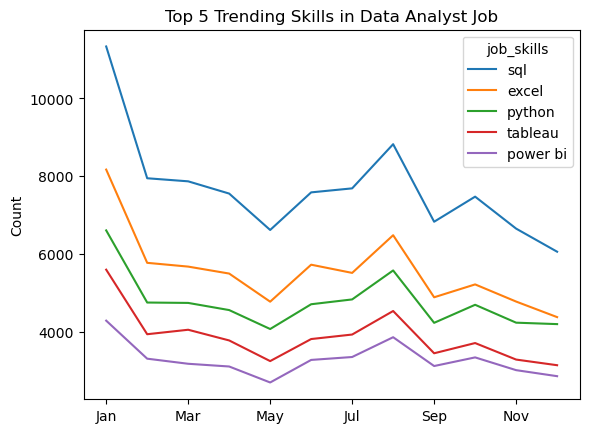

In [7]:
df_Job['job_posted_month_no'] = df_Job['job_posted_date'].dt.month

df_Job_explode = df_Job.explode('job_skills')
df_Job_pivot = df_Job_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_Job_pivot.loc['Total'] = df_Job_pivot.sum()
df_Job_pivot = df_Job_pivot[df_Job_pivot.loc['Total'].sort_values(ascending=False).index]
df_Job_pivot.drop('Total', inplace=True)

df_Job_pivot.reset_index(inplace=True)
df_Job_pivot['job_posted_month'] = df_Job_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_Job_pivot.set_index('job_posted_month', inplace=True)
df_Job_pivot.drop(columns='job_posted_month_no', inplace=True)

df_Job_pivot.iloc[:, :5].plot(kind='line')
plt.title(f'Top 5 Trending Skills in {job_title} Job')
plt.xlabel('')
plt.ylabel('Count')
plt.show()



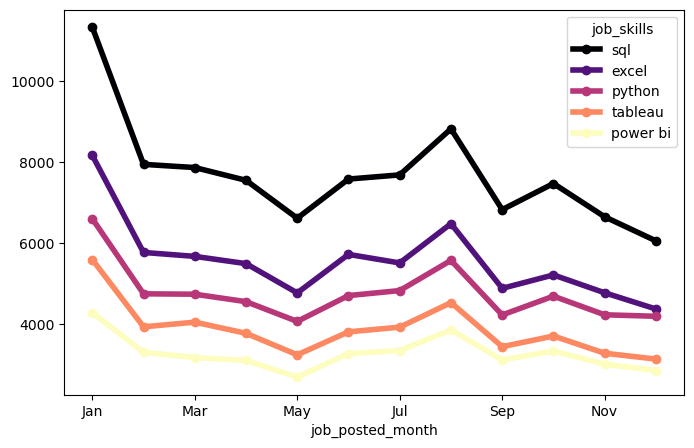

In [20]:
df_Job_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    colormap='magma',
    marker='o',
    figsize=(8,5)
)
plt.show()

In [23]:
job_title = 'Data Analyst'
df_job = df[df['job_title_short'] == job_title].copy()
df_exploded = df_job.explode(column = 'job_skills').copy()
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    salary_median = ('salary_year_avg', 'median')
).sort_values(['skill_count', 'salary_median'], ascending = False)

skill_count = 20
skill_stats = skill_stats.head(skill_count)

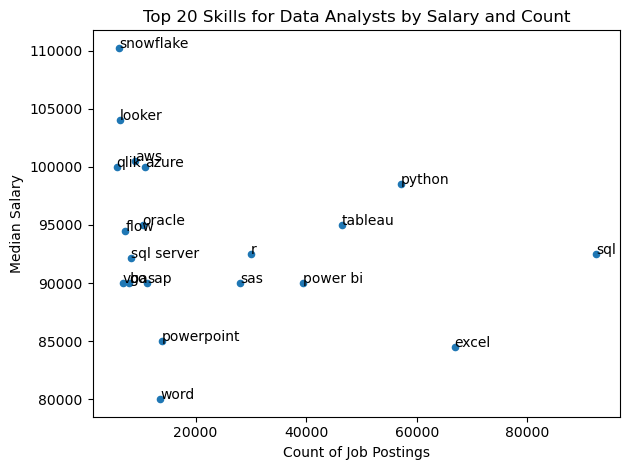

In [25]:
skill_stats.plot(kind='scatter', x = 'skill_count', y = 'salary_median')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title(f'Top {skill_count} Skills for {job_title}s by Salary and Count')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['salary_median'].iloc[i], txt)
plt.show()

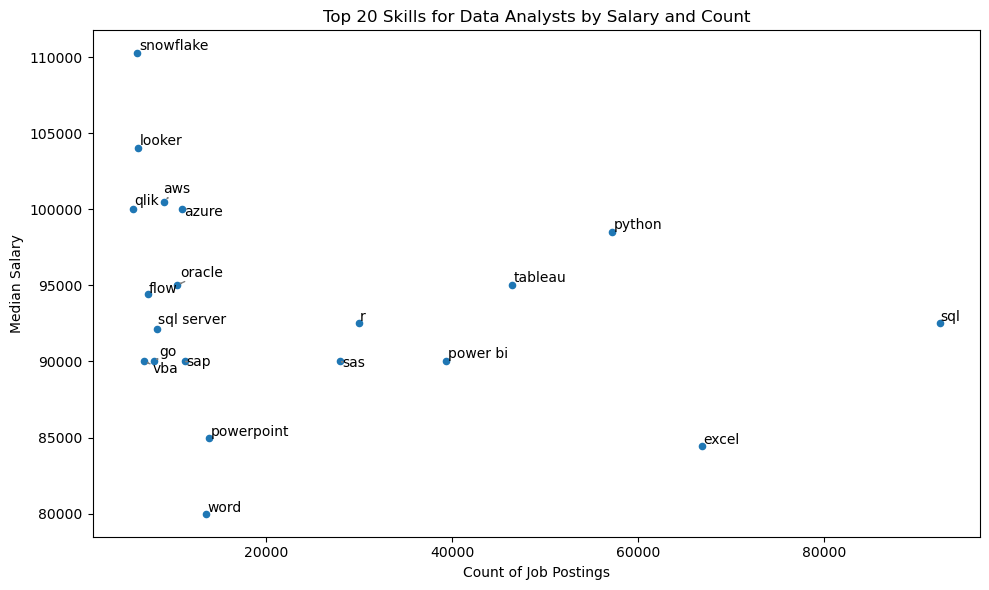

In [41]:
from adjustText import adjust_text


fig, ax = plt.subplots(figsize=(10, 6))
skill_stats.plot(kind='scatter', x = 'skill_count', y = 'salary_median', ax=ax)
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title(f'Top {skill_count} Skills for {job_title}s by Salary and Count')
plt.tight_layout()

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['salary_median'].iloc[i], txt))
adjust_text(texts, arrowprops = dict(arrowstyle='->', color = 'gray', lw = 1))
plt.show()

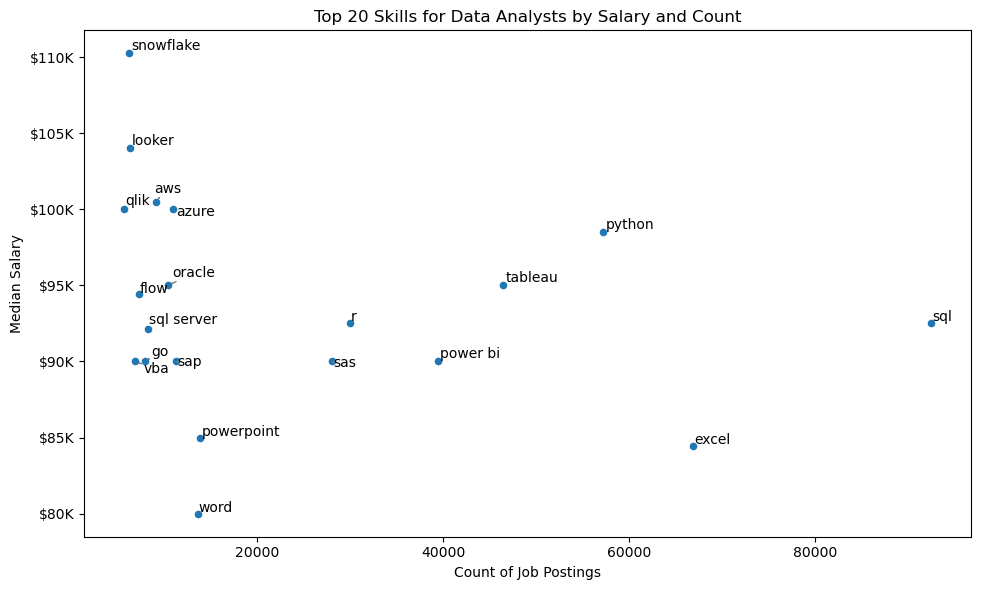

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
skill_stats.plot(kind='scatter', x = 'skill_count', y = 'salary_median', ax=ax)
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title(f'Top {skill_count} Skills for {job_title}s by Salary and Count')
plt.tight_layout()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['salary_median'].iloc[i], txt))
adjust_text(texts, arrowprops = dict(arrowstyle='->', color = 'gray', lw = 1))
plt.show()